In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [3]:
df1=pd.read_excel("/content/booking.xlsx",sheet_name='booking')

In [4]:
df2=pd.read_excel("/content/booking.xlsx",sheet_name='Customer_Details')

In [5]:
df1.head()

,Booking_ID,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,Previously Cancelled,Previously not cancelled,average price,special requests,booking status
0,INN00001,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled
1,INN00002,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled
3,INN00004,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled
4,INN00005,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled


In [6]:
df2.head()

,Booking_ID,number of adults,number of children,date of reservation,Month of reservation,Year of reservation
0,INN00001,1,1,10,2.0,2015.0
1,INN00584,1,0,7,1.0,2017.0
2,INN00696,2,0,7,1.0,2017.0
3,INN00770,2,0,7,1.0,2017.0
4,INN01133,2,0,7,1.0,2017.0


In [7]:
data=pd.merge(df1,df2,on=['Booking_ID'],how='inner')

In [8]:
print(df1.shape)
print(df2.shape)
print(data.shape)

(36292, 14)
(36285, 6)
(36292, 19)


In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(36285, 19)

In [11]:
data.head()

,Booking_ID,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,Previously Cancelled,Previously not cancelled,average price,special requests,booking status,number of adults,number of children,date of reservation,Month of reservation,Year of reservation
0,INN00001,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,1,1,10,2.0,2015.0
1,INN00002,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,1,0,11,6.0,2018.0
2,INN00003,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,2,1,2,28.0,2018.0
3,INN00004,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,1,0,5,20.0,2017.0
4,INN00005,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,1,0,4,11.0,2018.0


In [12]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36285 entries, 0 to 36291
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of weekend nights  36285 non-null  int64  
 2   number of week nights     36285 non-null  int64  
 3   type of meal              36285 non-null  object 
 4   car parking space         36285 non-null  int64  
 5   room type                 36285 non-null  object 
 6   lead time                 36285 non-null  int64  
 7   market segment type       36285 non-null  object 
 8   repeated                  36285 non-null  int64  
 9   Previously Cancelled      36285 non-null  int64  
 10  Previously not cancelled  36285 non-null  int64  
 11  average price             36285 non-null  float64
 12  special requests          36285 non-null  int64  
 13  booking status            36285 non-null  object 
 14  number

None

In [13]:
display(data.describe())

,number of weekend nights,number of week nights,car parking space,lead time,repeated,Previously Cancelled,Previously not cancelled,average price,special requests,number of adults,number of children,Month of reservation,Year of reservation
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36248.000000,36248.000000
mean,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733,1.844839,0.105360,15.583011,2017.820100
std,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262,0.518813,0.402704,8.734280,0.384396
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2015.000000
25%,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2.000000,0.000000,8.000000,2018.000000
50%,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2.000000,0.000000,16.000000,2018.000000
75%,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2.000000,0.000000,23.000000,2018.000000
max,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000,4.000000,10.000000,31.000000,2018.000000


In [14]:
[i for i in data.columns]

['Booking_ID',
 'number of weekend nights',
 'number of week nights',
 'type of meal',
 'car parking space',
 'room type',
 'lead time',
 'market segment type',
 'repeated',
 'Previously Cancelled',
 'Previously not cancelled',
 'average price',
 'special requests',
 'booking status',
 'number of adults',
 'number of children',
 'date of reservation',
 'Month of reservation',
 'Year of reservation']

In [15]:
data.nunique()

Booking_ID                  36285
number of weekend nights        8
number of week nights          18
type of meal                    4
car parking space               2
room type                       7
lead time                     352
market segment type             5
repeated                        2
Previously Cancelled            9
Previously not cancelled       59
average price                3930
special requests                6
booking status                  2
number of adults                5
number of children              6
date of reservation            13
Month of reservation           31
Year of reservation             4
dtype: int64

In [16]:
data.isnull().sum()

Booking_ID                   0
number of weekend nights     0
number of week nights        0
type of meal                 0
car parking space            0
room type                    0
lead time                    0
market segment type          0
repeated                     0
Previously Cancelled         0
Previously not cancelled     0
average price                0
special requests             0
booking status               0
number of adults             0
number of children           0
date of reservation          0
Month of reservation        37
Year of reservation         37
dtype: int64

In [17]:
data['Month of reservation'].fillna(data['Month of reservation'].median(), inplace=True)
data['Year of reservation'].fillna(data['Year of reservation'].mode()[0], inplace=True)

In [18]:
data.isnull().sum()

Booking_ID                  0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
Previously Cancelled        0
Previously not cancelled    0
average price               0
special requests            0
booking status              0
number of adults            0
number of children          0
date of reservation         0
Month of reservation        0
Year of reservation         0
dtype: int64

In [19]:
data['booking status'].value_counts()

Not_Canceled    24396
Canceled        11889
Name: booking status, dtype: int64

In [ ]:
# data['booking status'].value_counts(normalize=True)*100### Imbalnced

<Axes: >

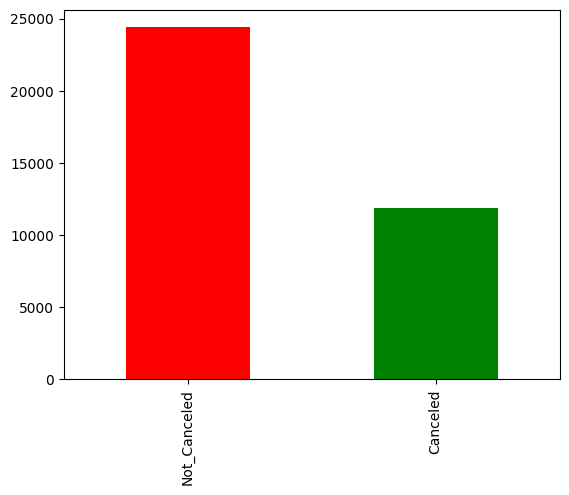

In [20]:
data['booking status'].value_counts().plot(kind='bar', color=['red', 'green'])

Relationship of booking status and Month of reservation

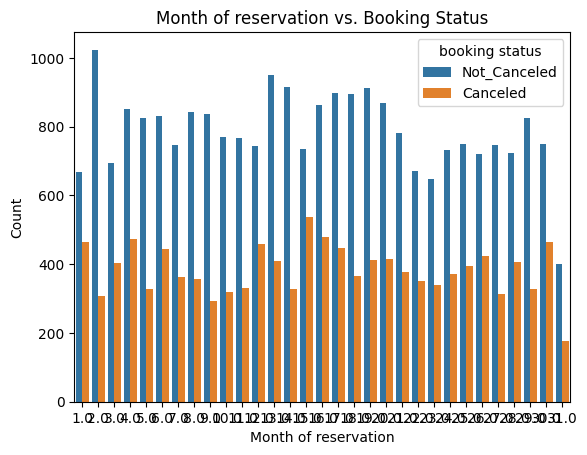

In [21]:
sns.countplot(x='Month of reservation', hue='booking status', data=data)
plt.xlabel('Month of reservation')
plt.ylabel('Count')
plt.title('Month of reservation vs. Booking Status')
plt.show()

Relationship of booking status and Year of reservation

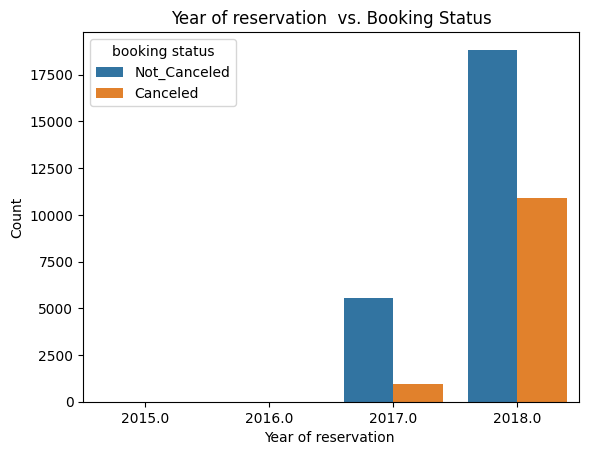

In [22]:
sns.countplot(x='Year of reservation', hue='booking status', data=data)
plt.xlabel('Year of reservation ')
plt.ylabel('Count')
plt.title('Year of reservation  vs. Booking Status')
plt.show()

In [ ]:
### Hypothesis: less the number of children traveling lesser the cancellations

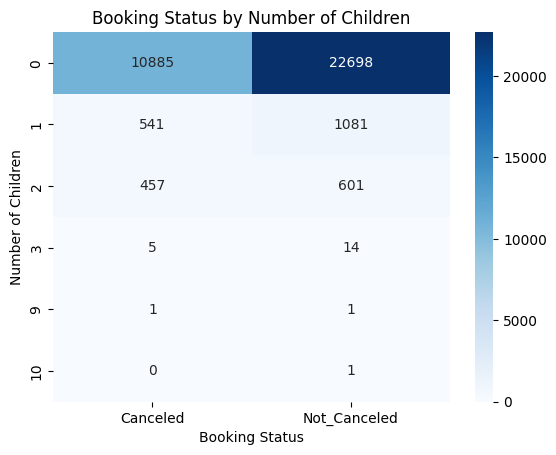

In [23]:
children_booking = pd.crosstab(data['number of children'], data['booking status'])

sns.heatmap(children_booking, annot=True, fmt='d', cmap='Blues')
plt.title('Booking Status by Number of Children')
plt.xlabel('Booking Status')
plt.ylabel('Number of Children')
plt.show()


Booking Status and Market Segment

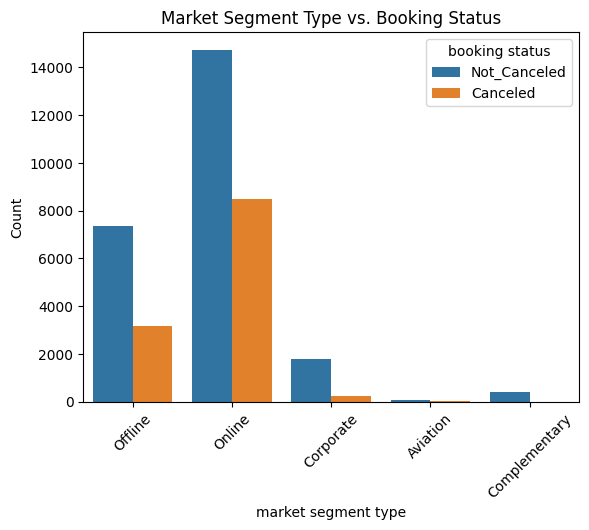

In [24]:
sns.countplot(x='market segment type', hue='booking status', data=data)
plt.xlabel('market segment type')
plt.ylabel('Count')
plt.title('Market Segment Type vs. Booking Status')
plt.xticks(rotation=45)
plt.show()

In [ ]:
### for categorical , chi square

In [25]:
from scipy.stats import chi2_contingency
for i in data.describe(include='object').columns:
  contigency_table=pd.crosstab(data['booking status'],data[i])
  x,p_value,y,z=chi2_contingency(contigency_table)
  print(i,p_value)

Booking_ID 0.4975317968311855
type of meal 3.4179336018719243e-60
room type 1.676912359241699e-10
market segment type 6.246509234218631e-175
booking status 0.0
date of reservation 2.11822838913066e-295


In [26]:
data.describe(include=object).columns[1:]

Index(['type of meal', 'room type', 'market segment type', 'booking status',
       'date of reservation'],
      dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder

# Loop through each categorical column
for i in data.describe(include=object).columns[1:]:
    le = LabelEncoder()

    # Convert the column to string type (if it's not already)
    data[i] = data[i].astype(str)

    # Fit and transform with LabelEncoder
    data[i] = le.fit_transform(data[i])


In [28]:
data

,Booking_ID,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,Previously Cancelled,Previously not cancelled,average price,special requests,booking status,number of adults,number of children,date of reservation,Month of reservation,Year of reservation
0,INN00001,2,5,0,0,0,224,3,0,0,0,88.00,0,1,1,1,1,2.0,2015.0
1,INN00002,1,3,3,0,0,5,4,0,0,0,106.68,1,1,1,0,2,6.0,2018.0
2,INN00003,1,3,0,0,0,1,4,0,0,0,50.00,0,0,2,1,4,28.0,2018.0
3,INN00004,0,2,0,0,0,211,4,0,0,0,100.00,1,0,1,0,8,20.0,2017.0
4,INN00005,1,2,3,0,0,48,4,0,0,0,77.00,0,0,1,0,7,11.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36287,INN36282,0,2,1,0,0,346,4,0,0,0,115.00,1,0,2,0,12,13.0,2018.0
36288,INN36283,1,3,0,0,0,34,4,0,0,0,107.55,1,1,2,0,1,15.0,2017.0
36289,INN36284,1,3,0,0,3,83,4,0,0,0,105.61,1,1,2,0,3,26.0,2018.0
36290,INN36285,0,4,0,0,0,121,3,0,0,0,96.90,1,1,3,0,10,6.0,2018.0


In [29]:
data.drop(['Booking_ID'], axis=1, inplace=True)


In [30]:
data

,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,Previously Cancelled,Previously not cancelled,average price,special requests,booking status,number of adults,number of children,date of reservation,Month of reservation,Year of reservation
0,2,5,0,0,0,224,3,0,0,0,88.00,0,1,1,1,1,2.0,2015.0
1,1,3,3,0,0,5,4,0,0,0,106.68,1,1,1,0,2,6.0,2018.0
2,1,3,0,0,0,1,4,0,0,0,50.00,0,0,2,1,4,28.0,2018.0
3,0,2,0,0,0,211,4,0,0,0,100.00,1,0,1,0,8,20.0,2017.0
4,1,2,3,0,0,48,4,0,0,0,77.00,0,0,1,0,7,11.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36287,0,2,1,0,0,346,4,0,0,0,115.00,1,0,2,0,12,13.0,2018.0
36288,1,3,0,0,0,34,4,0,0,0,107.55,1,1,2,0,1,15.0,2017.0
36289,1,3,0,0,3,83,4,0,0,0,105.61,1,1,2,0,3,26.0,2018.0
36290,0,4,0,0,0,121,3,0,0,0,96.90,1,1,3,0,10,6.0,2018.0


In [31]:
list(data.corr()['booking status'].index)

['number of weekend nights',
 'number of week nights',
 'type of meal',
 'car parking space',
 'room type',
 'lead time',
 'market segment type',
 'repeated',
 'Previously Cancelled',
 'Previously not cancelled',
 'average price',
 'special requests',
 'booking status',
 'number of adults',
 'number of children',
 'date of reservation',
 'Month of reservation',
 'Year of reservation']

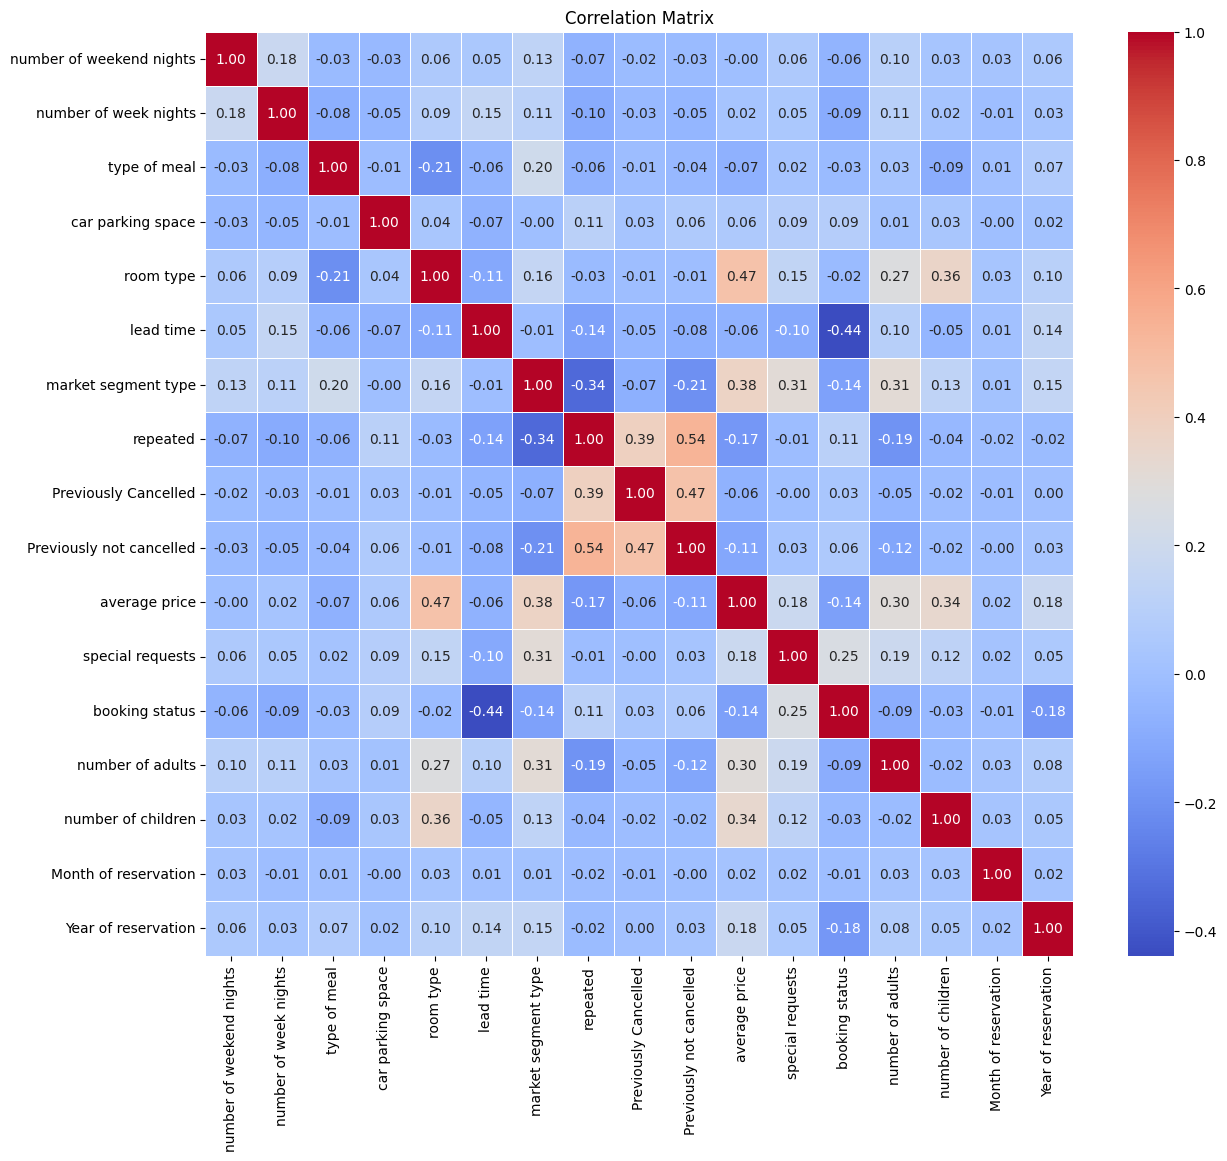

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


selected_features = ['number of weekend nights', 'number of week nights', 'type of meal',
                     'car parking space', 'room type', 'lead time', 'market segment type',
                     'repeated', 'Previously Cancelled', 'Previously not cancelled',
                     'average price', 'special requests', 'booking status',
                     'number of adults', 'number of children', 'Month of reservation',
                     'Year of reservation']

# Extract the subset of the DataFrame containing only the selected features
correlation_data = data[selected_features]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'number of weekend nights'),
  Text(1, 0, 'number of week nights'),
  Text(2, 0, 'type of meal'),
  Text(3, 0, 'car parking space'),
  Text(4, 0, 'room type'),
  Text(5, 0, 'lead time'),
  Text(6, 0, 'market segment type'),
  Text(7, 0, 'repeated'),
  Text(8, 0, 'Previously Cancelled'),
  Text(9, 0, 'Previously not cancelled'),
  Text(10, 0, 'average price'),
  Text(11, 0, 'special requests'),
  Text(12, 0, 'booking status'),
  Text(13, 0, 'number of adults'),
  Text(14, 0, 'number of children'),
  Text(15, 0, 'date of reservation'),
  Text(16, 0, 'Month of reservation'),
  Text(17, 0, 'Year of reservation')])

<Figure size 2000x1000 with 0 Axes>

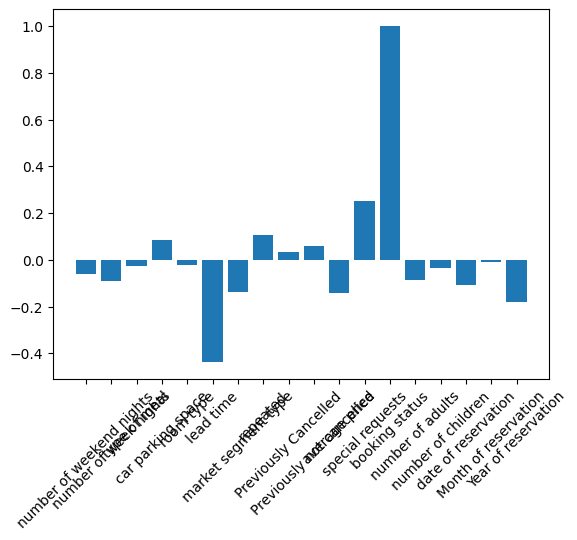

In [34]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
ax.bar(list(data.corr()['booking status'].index),list(data.corr()['booking status'].values))
plt.xticks(rotation=45)


In [35]:
data.corr()['booking status']

number of weekend nights   -0.061489
number of week nights      -0.092824
type of meal               -0.026772
car parking space           0.086179
room type                  -0.022877
lead time                  -0.438491
market segment type        -0.136005
repeated                    0.107277
Previously Cancelled        0.033725
Previously not cancelled    0.060174
average price              -0.142433
special requests            0.253092
booking status              1.000000
number of adults           -0.086774
number of children         -0.033007
date of reservation        -0.107541
Month of reservation       -0.011176
Year of reservation        -0.179199
Name: booking status, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split
y=data['booking status']
x=data.drop(['booking status','date of reservation'],axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=121)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(29028, 16) (29028,) (7257, 16) (7257,)


In [42]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a list of classifiers
classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    MLPClassifier(),
    LinearDiscriminantAnalysis()
    # Add more classifiers as needed
]

# Create a DataFrame to store metrics
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate through each classifier
for clf in classifiers:
    # Train the model
    clf.fit(x_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append results to the DataFrame
    metrics_df = metrics_df.append({
        'Model': clf.__class__.__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

# Print the table of metrics
print(metrics_df)

                        Model  Accuracy  Precision    Recall  F1 Score
0      RandomForestClassifier  0.903266   0.912055  0.947250  0.929319
1  GradientBoostingClassifier  0.857241   0.864500  0.933703  0.897770
2          LogisticRegression  0.789858   0.812278  0.893473  0.850943
3                         SVC  0.766432   0.768464  0.933292  0.842896
4        KNeighborsClassifier  0.809288   0.831685  0.897578  0.863376
5                  GaussianNB  0.433375   0.943925  0.165846  0.282123
6      DecisionTreeClassifier  0.864682   0.900866  0.897167  0.899013
7               MLPClassifier  0.793303   0.782981  0.957512  0.861496
8  LinearDiscriminantAnalysis  0.794268   0.810741  0.904762  0.855175


In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you already have x_train, x_test, y_train, y_test from your previous code
# If not, replace it with your data preparation steps

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(units=128, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=2)

# Make predictions on the test set
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Epoch 1/10
908/908 - 3s - loss: 1.7671 - accuracy: 0.6875 - val_loss: 0.5680 - val_accuracy: 0.7735 - 3s/epoch - 4ms/step
Epoch 2/10
908/908 - 2s - loss: 0.6832 - accuracy: 0.7103 - val_loss: 0.5763 - val_accuracy: 0.7256 - 2s/epoch - 2ms/step
Epoch 3/10
908/908 - 2s - loss: 0.5938 - accuracy: 0.7312 - val_loss: 0.5117 - val_accuracy: 0.7797 - 2s/epoch - 2ms/step
Epoch 4/10
908/908 - 2s - loss: 0.5439 - accuracy: 0.7497 - val_loss: 0.6355 - val_accuracy: 0.7353 - 2s/epoch - 2ms/step
Epoch 5/10
908/908 - 3s - loss: 0.5361 - accuracy: 0.7534 - val_loss: 0.4800 - val_accuracy: 0.7693 - 3s/epoch - 3ms/step
Epoch 6/10
908/908 - 2s - loss: 0.4856 - accuracy: 0.7700 - val_loss: 0.4710 - val_accuracy: 0.7753 - 2s/epoch - 2ms/step
Epoch 7/10
908/908 - 2s - loss: 0.5044 - accuracy: 0.7622 - val_loss: 0.4856 - val_accuracy: 0.7699 - 2s/epoch - 2ms/step
Epoch 8/10
908/908 - 2s - loss: 0.4925 - accuracy: 0.7667 - val_loss: 0.4705 - val_accuracy: 0.7837 - 2s/epoch - 2ms/step
Epoch 9/10
908/908 - 2s 